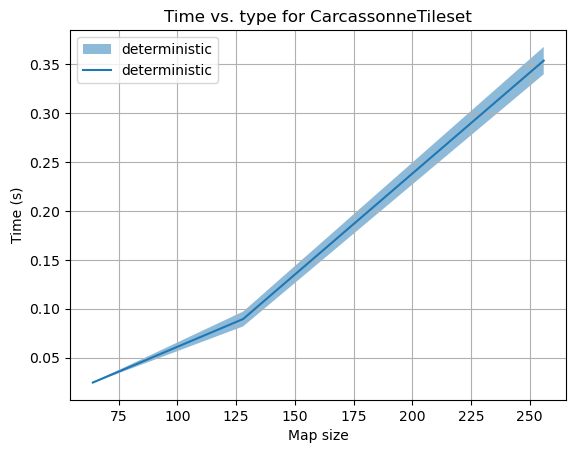

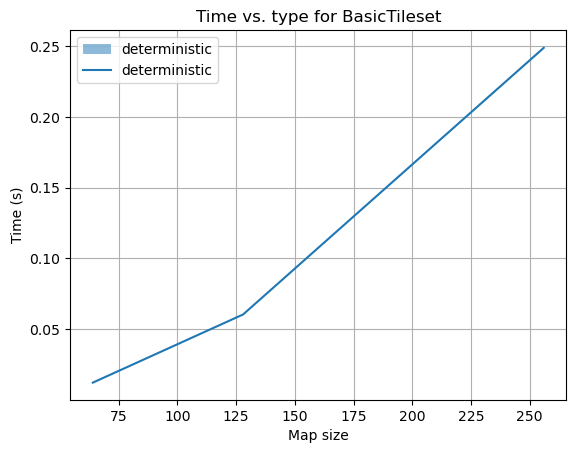

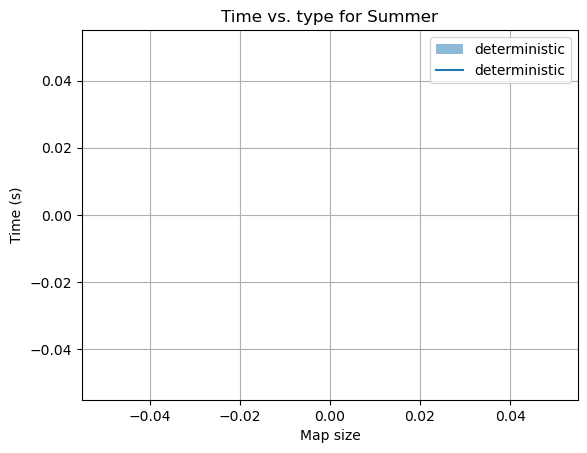

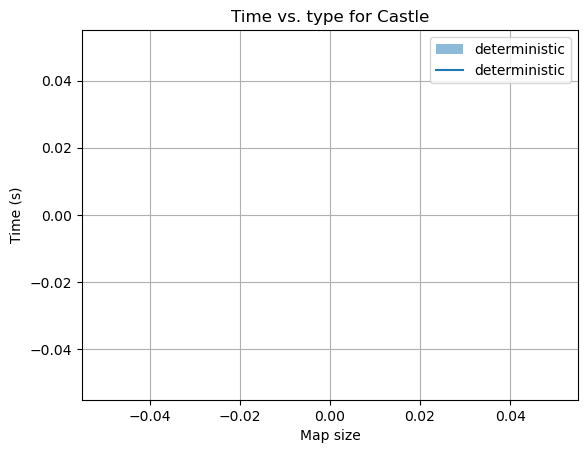

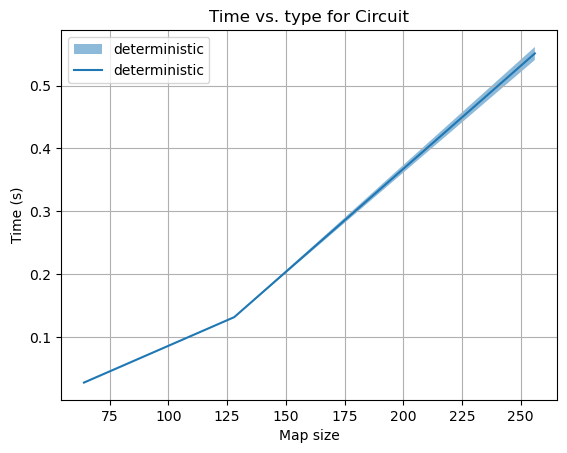

In [24]:
import numpy as np
import matplotlib.pyplot as plt

tilesets = {"deterministic": {},  "standard": {}} #"non_deterministic": {},
for t in tilesets.keys():
    data = np.genfromtxt("data/map_size_{}.csv".format(t), delimiter=",", dtype=str)

    for i in range(1, len(data)):
        tileset = data[i][0]
        size = int(data[i][1])
        time = float(data[i][2])
        err = float(data[i][3])

        if tileset not in tilesets[t]:
            tilesets[t][tileset] = {}
        tilesets[t][tileset][size] = (time, err)

# # make a plot with a line for each tileset and type
# for t in types:
#     plt.figure()
#     plt.title("Map size vs. time for {}".format(t))
#     for tileset in tilesets[t]:
#         x = []
#         y = []
#         for size in tilesets[t][tileset]:
#             x.append(size)
#             y.append(tilesets[t][tileset][size])
#         plt.plot(x, y, label=tileset)
#     plt.legend()
#     plt.xlabel("Map size")
#     plt.ylabel("Time (s)")
#     plt.show()

# make a grouped bar plot with a group for each tileset and a plot for each size
# sizes = list(tilesets["deterministic"]["CarcassonneTileset"].keys())
# tileset_names = list(tilesets["deterministic"].keys())
# type_names = list(tilesets.keys())
# for size in [64, 128, 256]:
#     x = np.arange(len(tileset_names))
#     width = 0.25
#     multiplier = 0

#     plt.figure()
#     for type_name in type_names:
#         y = []
#         for tileset_name in tileset_names:
#             y.append(tilesets[type_name][tileset_name][size])

#         offset = width * multiplier
#         rects = plt.bar(x + offset, y, width, label=type_name)
#         # plt.bar_label(rects, padding=3)
#         multiplier += 1
    
#     # plt.ylim(0, 8)
#     plt.title("Time vs. type for map size {}".format(size))
#     plt.xticks(x + width, tileset_names)
#     plt.legend(loc='upper left', ncols=3)
#     plt.legend()
#     plt.show()

# make a line plot for each tileset with a line for each type
tileset_names = list(tilesets["deterministic"].keys())
type_names = list(tilesets.keys())
for tileset_name in tileset_names:
    plt.figure()
    plt.title("Time vs. type for {}".format(tileset_name))
    for type_name in type_names:
        x = []
        y = []
        err = []
        for size in tilesets[type_name][tileset_name]:
            x.append(size)
            y.append(tilesets[type_name][tileset_name][size][0])
            err.append(tilesets[type_name][tileset_name][size][1])

        y = np.array(y)
        err = np.array(err)
        # plt.errorbar(x, y, err, label=type_name, fmt="k.", capsize=2)
        plt.fill_between(x, y - 3 * err,  y + 3 *err, label=type_name, alpha=0.5)
        plt.plot(x, y, label=type_name)

    plt.legend()
    plt.xticks()
    plt.yticks()
    plt.grid()
    plt.xlabel("Map size")
    plt.ylabel("Time (s)")
    plt.show()
    